In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
fp = os.path.join('data', 'Persikov 2009-14', 'database.txt')

In [3]:
data = []
for line in open(fp):
    lst_of_lsts = [entry.split('=') for entry in line.split()]
    temp = {}
    for lst in lst_of_lsts:
        temp[lst[0]] = lst[1]
    temp_keys = temp.keys()
    data.append(temp)

In [4]:
zf_df = pd.DataFrame(data)
zf_df.head()

,source,dna,zf,f1,f2,f3,ex,Kd,dna2,f4,f5,f6,KdSd,Ka,KaSd,f12,f22,f32,cs,lbl
0,DBSFB01,ctcgcgGGGgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,RSDERKRHTKI,Kd,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DBSFB01,ctcgcgGAAgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,RSDERKRHTKI,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DBSFB01,ctcgcgGCGgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,RSDERKRHTKI,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DBSFB01,ctcgcgGTTgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,RSDERKRHTKI,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DBSFB01,ctcgcgGGGgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,RSDERKRHTKI,>,NaN,ctcgcgGACgcggcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
binding_zf3_df = zf_df[(zf_df['zf'] == '3') & (zf_df['ex'] != '-')].drop(columns=['zf'])
nonbinding_zf3_df = zf_df[(zf_df['zf'] == '3') & (zf_df['ex'] == '-')].drop(columns=['zf'])

In [49]:
display(binding_zf3_df['ex'].value_counts())
display(nonbinding_zf3_df['ex'].shape)

+     1455
>     1001
Kd     643
Name: ex, dtype: int64

(948,)

In [50]:
def to_PWM(seq):
    """
    seq: a sequence of ACGT or acgt
    Transforms s from a string to a PWM; rows are in order ACGT
    """
    if type(seq) != str:
        return np.array([[],[],[],[]])
    # temporarily, we will eliminate any letter that is not ACGTacgt
    seq_len = len(seq)
    temp = ''
    for i in range(seq_len):
        if seq[i] in ['A', 'a', 'C', 'c', 'G', 'g', 'T', 't']:
            temp += seq[i]
    
    seq_len = len(temp)
    output = [[0 for _ in range(seq_len)] for _ in range(4)]
    for i in range(seq_len):
        letter = seq[i]
        if letter in ['A', 'a']: # how to handle uppercase and lowercase letters?
            output[0][i] = 1
        elif letter in ['C', 'c']:
            output[1][i] = 1
        elif letter in ['G', 'g']:
            output[2][i] = 1
        elif letter in ['T', 't']:
            output[3][i] = 1
        #else:
            # print('Unexpected letter in ', seq)
            # return np.NaN
    return np.array(output)

In [51]:
binding_zf3_df['PWM'] = zf3_df['dna'].apply(to_PWM)
binding_zf3_df['PWM2'] = zf3_df['dna2'].apply(to_PWM)

In [53]:
binding_zf3_df.to_excel('Persikov_binding_zf3.xlsx')
nonbinding_zf3_df.to_excel('Persikov_nonbinding_zf3.xlsx')

In [54]:
binding_zf3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 0 to 4082
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  3099 non-null   object
 1   dna     3099 non-null   object
 2   f1      3099 non-null   object
 3   f2      3099 non-null   object
 4   f3      3099 non-null   object
 5   ex      3099 non-null   object
 6   Kd      654 non-null    object
 7   dna2    959 non-null    object
 8   f4      0 non-null      object
 9   f5      0 non-null      object
 10  f6      0 non-null      object
 11  KdSd    192 non-null    object
 12  Ka      320 non-null    object
 13  KaSd    124 non-null    object
 14  f12     42 non-null     object
 15  f22     42 non-null     object
 16  f32     42 non-null     object
 17  cs      14 non-null     object
 18  lbl     8 non-null      object
 19  PWM     3099 non-null   object
 20  PWM2    3099 non-null   object
dtypes: object(21)
memory usage: 532.6+ KB


Below is the *unfinished* code on aligning with DNA sequences from Databases_ZF Designs

In [179]:
fp = os.path.join('data', 'UniProt_ZF.csv')
UniProt_ZF = pd.read_csv(open(fp))

In [180]:
UniProt_ZF.head()

,Unnamed: 0,Entry (Uniprot ID),Entry name,Protein names,Gene names,Organism,Zinc finger,Sequence,DNA Binding Sequence (to be added)
0,7847,A0A068A9T3,BREF8_EUPBR,Probable C2H2-type zinc-finger transcription f...,orf8,Eupenicillium brefeldianum (Penicillium brefel...,AECPVCGAVFTRTTARNIHVFERC,MSGSSEPYSDEPSQHNTHRFIDQIPDYPWDDYSGPPLQQSRGYSSQ...,NaN
1,2504,A0A0A7EPL0,PIAL1_ARATH,E4 SUMO-protein ligase PIAL1 (EC 2.3.2.-) (Pro...,PIAL1 EMB3001 At1g08910 F7G19.21,Arabidopsis thaliana (Mouse-ear cress),SDCDIIEGPSRISLSCPISRTRIKLPVKGHVCKHLQCFDFWNYVNM...,MVIPATSRFGFRAEFNTKEFQASCISLANEIDAAIGRNEVPGNIQE...,NaN
2,7173,A0A0A7HJC7,BRLA_ACRCH,C2H2 type master regulator of conidiophore dev...,brlA,Acremonium chrysogenum (Cephalosporium acremon...,"CKCDYPGCNKAFRRNEHLKRHKQTF, FSCEFCGKDQFNRQDNLNN...",MEDGFGMYSHSMSCPSTASTSFSSASSSAYDPFTPSSRRSTPNELS...,NaN
3,7060,A0A0B2XG51,BRLA_METRA,C2H2 type master regulator of conidiophore dev...,BrlA MAA_10599,Metarhizium robertsii (strain ARSEF 23 / ATCC ...,"CKCDYPGCHKAFRRNEHLKRHKQTF, FSCEFCGKDQFNRQDNLNN...",MQFESDFRFDMDDSFSMCSQTLPCPSAGSSFSSASSAYEPFTPTSR...,NaN
4,1258,A0A0B4K7J2,RBP2_DROME,E3 SUMO-protein ligase RanBP2 (EC 2.3.2.-) (35...,Nup358 RanBP2 CG11856,Drosophila melanogaster (Fruit fly),"KAGSWNCQACYTNNGQDQLYCLACQEPKDA, AVGSWSCSACYVNN...",MFTTRKEVDAHVHKMLGKLQPGRERDIKGLAVARLYMKVQEYPKAI...,NaN


In [193]:
zf3_df = zf3_df.assign(fingers=zf3_df['f1'] + zf3_df['f2'] + zf3_df['f3'])

In [203]:
zf3_df[['f1','f2','f3']].iloc[0]

f1    KSADLKRHIRI
f2    RSDHLTTHIRT
f3    RSDERKRHTKI
Name: 0, dtype: object

In [214]:
def uniprot_seq_contains(f):
    lst = []
    for i, seq in enumerate(UniProt_ZF['Sequence']):
        if f in seq:
            lst.append(i)
    return lst

In [221]:
print(uniprot_seq_contains('KSADLKRHIRI'))
print(uniprot_seq_contains('RSDHLTTHIRT'))
print(uniprot_seq_contains('RSDERKRHTKI'))

[]
[243, 503, 2962, 2963, 2964, 2965, 3373, 3377, 3379, 3726, 3920, 4155, 4156, 4157, 4158, 4581, 4582, 4765, 5445, 5502, 5550, 6415, 8723, 8871]
[243, 503, 2962, 2963, 2964, 3373, 3377, 3379, 3726, 3920, 4155, 4765, 5445, 5550, 6415, 8723, 8871]


In [219]:
UniProt_ZF.iloc[8871]['Zinc finger']

'YACPVESCDRRFSRSDELTRHIRIH, FQCRICMRNFSRSDHLTTHIRTH, FACDICGRKFARSDERKRHTKIH'

In [79]:
temp_df[temp_df['zf'] == '6']

,source,dna,zf,f1,f2,f3,ex,Kd,dna2,f4,f5,f6,KdSd,Ka,KaSd,f12,f22,f32,cs,lbl
427,DBSFB01,aaaATGTAGAGAAAAACCAGGtct,6,RSDHLAEHIRI,DKKDLTRHIRT,QRANLRAHTKI,Kd,.0075,NaN,QLAHLRAHTKI,REDNLHTHTKI,RRDALNVHTKI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,DBSFB01,gggACCGGAGAAACCAGGGGAgcc,6,QSSHLVRHIRI,RSDHLTNHIRT,DKKDLTRHTKI,Kd,15,NaN,QSSNLVRHTKI,QSSHLVRHTKI,DKKDLTRHTKI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,DBSFB01,gacATCGAGGCAAGAGCCACCtga,6,DKKDLTRHIRI,DCRDLARHIRT,QLAHLRAHTKI,Kd,8,NaN,QSGDLRRHTKI,RSDNLVRHTKI,DPGALRVHTKI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,DBSFB01,gtcGCCGCAGCAGCCACCAATtcg,6,TTGNLTVHIRI,DKKDLTRHIRT,DCRDLARHTKI,Kd,2,NaN,QSGDLRRHTKI,QSGDLRRHTKI,DCRDLARHTKI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2156,BMB03,---TGAGCGGCTTGAGGGGTC---,6,DPGALVR,RSDKLVR,QAGHLAS,Kd,23,NaN,TSGELVR,RSDDLVR,QAGHLAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157,BMB03,---GCAGACGGTTAGGACGCC---,6,DCRDLAR,DPGNLVR,REDNLHT,Kd,74,NaN,TSGHLVR,DPGNLVR,QSGDLRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2160,BMB03,---GTAGGTTGGGAAAGAGGA---,6,QSSHLVR,QLAHLRA,QSSNLVR,+,NaN,NaN,RSDHLTT,TSGHLVR,QSSSLVR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161,BMB03,---TGAGCGGCTTGAGGGGTC---,6,DPGALVR,RSDKLVR,QAGHLAS,+,NaN,NaN,TSGELVR,RSDDLVR,QAGHLAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162,BMB03,---GCTAGAGCAGTTGACTAA---,6,QSSNLAS,DPGNLVR,TSGSLVR,+,NaN,NaN,QSGDLRR,QLAHLRA,TSGELVR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2163,BMB03,---GCAGACGGTTAGGACGCC---,6,DCRDLAR,DPGNLVR,REDNLHT,+,NaN,NaN,TSGHLVR,DPGNLVR,QSGDLRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
temp_df['zf'].value_counts()

3    4047
2      21
6      15
Name: zf, dtype: int64

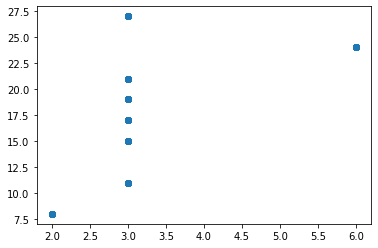

In [71]:
plt.scatter(temp_df['zf'].apply(int), temp_df['dna'].apply(len))